# Gradient Descent


## 1.简介
在微积分里面，对多元函数的参数求$\partial$偏导数，把求得的各个参数的偏导数以向量的形式写出来，就是梯度。比如函数$f(x,y)$ 分别对$x,y$求偏导数，求得的梯度向量就是$(\partial f/\partial x,\partial f/\partial y)^T$,简称$grad \  f(x,y)$或者$\nabla f(x,y)$。梯度下降是求解无约束优化问题常用的一种优化算法，常用于机器学习和人工智能当中用来递归性地逼近最小偏差模型。
## 2.算法
考虑无约束的优化问题$\min f(x)$,其中$f(x)$为连续可微函数，若能构造一个序列$x^{(0)}, x^{(1)}, \ldots$满足
$$f(x^{(t+1)})<f(x^{(t)})$$
不断迭代该过程，即可收敛到极小值。
根据泰勒展开，
$$f(x+\Delta x) \approx f(x)+\Delta x\cdot \Delta f(x)$$
令$\Delta x=-\gamma \cdot \Delta f(x)$,显然此时
$$f(x+\Delta x) < f(x)$$
不断重复该过程即是梯度下降。

### 2.1 单变量
对于连续可微函数$f(x)$,求$min\ f(x)$
定义迭代轮数$M$，更新步长$\alpha$和最小偏差$\epsilon$,
1. 初始化变量$x$,值为$x^{(0)}$
2. 更新变量$x$,如下，
$$x^{(l)}=x^{(l-1)}-\left. \alpha \cdot \frac{\partial f}{\partial x} \right|_{x^{(l-1)}}$$
其中$x^{(l)}$表示变量$x$在第$l$次迭代时的取值
3. 重复步骤2, 直到迭代轮次到达$M$,或者$\vert x^{(l)}-x^{(l-1)} \vert < \epsilon$
此时认为在位置$x^{(l)}$处达到最小，最小值为$f(x^{(l)})$

### 2.2 多变量
对于连续可微函数$f(x_1,x_2,\cdots,x_n)$,求$min\ f(x_1,x_2,\cdots,x_n)$
1. 初始化变量$x_1,x_2,\cdots,x_n$,值为$x_1^{(0)},x_2^{(0)},\cdots,x_n^{(0)}$  
2. 依次更新变量$x_1,x_2,\cdots,x_n$,  
**for i in [1-n]:**  
$\ \ \ \ x_i^{(l)} = x_{i-1}^{(l)}-\alpha \cdot \left. \frac{\partial f}{\partial x_i^{(l)}} \right|_{x_i^{(l)}=x_{i}^{(l-1)}}$
其中$x_i^{(l)}$表示第$i$个变量在第$l$次迭代时的取值
3. 重复步骤2, 直到迭代轮次到达$M$,或者$\vert x_i^{(l)}-x_i^{(l-1)} \vert < \epsilon, \forall i \in \{1, 2, \ldots, n\}$
此时认为在位置$(x_1^{(l)},x_2^{(l)}, \ldots, x_n^{(l)})$处达到最小，最小值为$f(x_1^{(l)},x_2^{(l)}, \ldots, x_n^{(l)})$

## 3. 例子

### 3.1 一元函数最小值
函数为 $$f(x) = 4x^2 - 7x + 10, x \in (-\infty, +\infty )$$
目的是求函数$f(x)$的最小值

函数图像为如下，

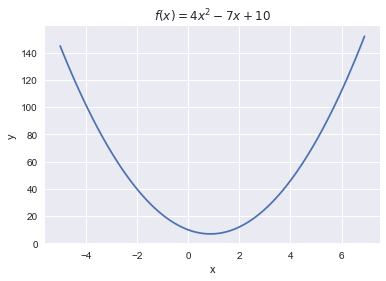

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

f = lambda x: 4*x*x - 7*x + 10

x = np.arange(-5, 7, 0.1)
y = f(x)

ax = plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("$f(x)=4x^2-7x+10$")

plt.show()

**求解代码如下所示**

In [18]:
from sympy import Symbol, diff, lambdify


def gradient_decsent(f, initial_state=0, step=0.1, rounds=100, eps=0.0001):
    x = Symbol("x")
    f_func = lambdify(expr=f, args=x)
    f_partial_func = lambdify(expr=diff(f), args=x)
    
    # v0 = f_func(initial_state)
    gap = 10
    t = 0
    ret = [initial_state]
    while t < rounds and gap > eps:
        prev = initial_state
        initial_state = initial_state - step*f_partial_func(initial_state)
        gap = abs(initial_state - prev)
        t += 1
        ret.append(initial_state)
    # print(t)
    return ret, initial_state, f_func(initial_state)


if __name__ == "__main__":    
	x = Symbol("x")
	f = 4*pow(x, 2) - 7*x + 10
	ret, bst_x, bst_v = gradient_decsent(f, initial_state=100, rounds=100000, step=0.01, eps=0.0000001)
	print(f"optimize rounds is {len(ret)}, best x is {bst_x}, best value is {bst_v}")

optimize rounds is 221, best x is 0.8750010702992382, best value is 6.937500000004583


下面将上述优化过程进行可视化

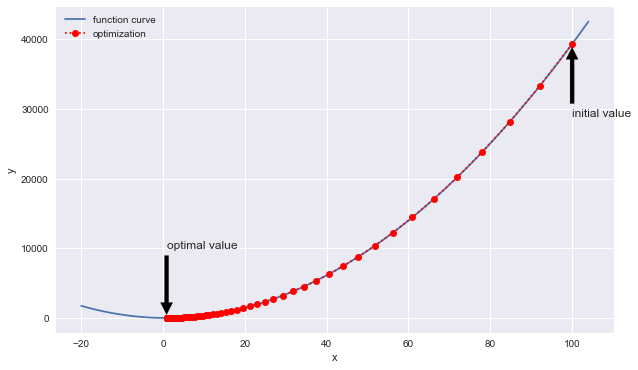

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


sns.set()

f = lambda x: 4*x*x - 7*x + 10
x = np.arange(-20, 105, 1)
y = f(x)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y)

plt.xlabel("x")
plt.ylabel("y")
# plt.title("$f(x)=4x^2-7x+10$")

opt_x = np.array(ret)
y = f(opt_x)

ax.plot(opt_x, y, 'r:o')

plt.legend(["function curve", "optimization"])

# plt.text(opt_x[-1], y[-1], "optimal value", fontsize=12)
ax.annotate("optimal value", xy=(opt_x[-1], y[-1]), xytext=(opt_x[-1], y[-1]+10000),
            arrowprops=dict(facecolor='black', shrink=0.05), multialignment='left')

ax.annotate("initial value", xy=(opt_x[0], y[0]), xytext=(opt_x[0], y[0]-10000),
            arrowprops=dict(facecolor='black', shrink=0.05), verticalalignment='center')

plt.show()

### 3.2 二元函数最小值
函数为 $$f(x,y ) = x^2 + y^2, x \in (-\infty, +\infty ), y \in (-\infty, +\infty)$$
求函数$f(x)$的最小值，函数图像如下所示，

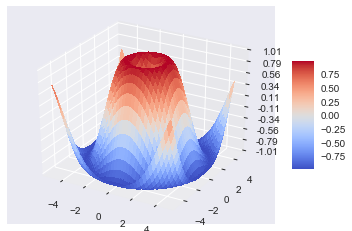

In [59]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [60]:
from sympy import Symbol, diff, lambdify


def gradient_decsent(f, initial_state=[-20, 10], step=0.1, rounds=100, eps=0.0001):
    x, y = Symbol("x"), Symbol("y")
    f_func = lambdify(expr=f, args=(x, y))
    f_partial_func = [lambdify(expr=diff(f, x), args=x), lambdify(expr=diff(f, y), args=y)]
    
    gap = 10
    t = 0
    ret = [initial_state]
    while t < rounds and gap > eps:
        prev = initial_state
        gap = 0
        tmp_ret = []
        for index, val in enumerate(initial_state):
            tmp_ret.append(val - step*f_partial_func[index](val)) # update x,y
            gap += abs(tmp_ret[index] - prev[index])
        t += 1
        initial_state = tmp_ret
        ret.append(tmp_ret)
    # print(t)
    return ret, initial_state, f_func(*initial_state)


if __name__ == "__main__":    
	x, y = Symbol("x"), Symbol("y")
	f = pow(x, 2) + pow(y, 2)
	ret, bst_x, bst_v = gradient_decsent(f, initial_state=[9, -9], rounds=200, step=0.1, eps=0.001)
	print(f"optimize rounds is {len(ret)}, best x is {bst_x}, best value is {bst_v}")

optimize rounds is 39, best x is [0.0018692268690725378, -0.0018692268690725378], best value is 6.9880181761254444e-06


优化过程如下

## 4. 应用
### 4.1 线性模型

对于线性模型$$h_\theta(x_1, \ldots,x_n)=\theta_0+\theta_1x_1+\theta_2x_2+\ldots+\theta_nx_n$$
其中$\theta_i,i=0,\ldots,n$是模型参数,$x_i,i=0,\ldots,n$是特征数据
已知的数据为特征数据和$y$标签。目标即是根据已知的特征数据和$y$标签来求解模型参数，即$\theta_i,i=0,\ldots,n$. 对于线性模型通常选择平方损失函数作为损失函数，如下，
$$L=\sum_{j=1}^m (h_\theta(x^{(j)})-y_j)^2$$
那么相当于求解如下，
$$\theta^* = \underset{\theta}{\rm{arg}\ \rm{min}}\ L$$
定义迭代轮数M，更新步长$\alpha$和最小偏差$\epsilon$,
- 1.随机初始化$\theta_i^{(0)},i=1,\ldots,n$
- 2.依次更新$\theta_i^{(l)}$，其中$l$表示更新的轮次  
**for i in [0-n]:**  
$\ \ \ \ \theta_i^{(l)} = \theta_{i-1}^{(l)}-\alpha \cdot \left. \frac{\partial L}{\partial \theta_i^{(l)}} \right|_{\theta_i^{(l)}=\theta_{i}^{(l-1)}}$
- 3.不断更新第二个步骤，直到更新的轮数大于M或者$\theta_i^{(l)}-\theta_i^{(l-1)}$的偏差小于$\epsilon$

## 5. 一些思考
-  算法的收敛性
如果函数是凸函数，那么通过梯度下降算法必然可以求得最小值，反之求得可能是极小值。凸函数[相关定理](https://wenku.baidu.com/view/ecf3cd7b19e8b8f67d1cb903.html)
-  梯度方向为什么是最快下降方向
简单的[推导](https://blog.csdn.net/llwleon/article/details/79237053#commentBox)
- 梯度下降可以有哪些优化  
1）初始位置的选择，为避免陷入极小值，可以多选几个候选点，比较下结果  
2）步长的选择，算法步长应当随迭代次数的增加递减，防止在极小值点出现波动  
3）特征归一化，对于结构化训练数据，当用梯度下降时，可以提前将数据归一化，加快收敛速度  

## 6. 参考资源

[1]. 周志华， 机器学习，p407-408  
[2]. [梯度下降（Gradient Descent）小结](https://www.cnblogs.com/pinard/p/5970503.html)  
[3]. [Gradient descent-Wiki](https://en.wikipedia.org/wiki/Gradient_descent#Examples)